# Quick Evaluation

In [1]:
import numpy as np 
import pandas as pd 
from pymoo.indicators.hv import HV
import matplotlib.pyplot as plt
from Plugins import evaluation_methods
from Plugins import cd_diagram

In [2]:
#PROBLEMS AND OBJECTIVES
#WFG Problems 
wfg_problems = ['wfg1', 'wfg2', 'wfg3', 'wfg4', 'wfg5', 'wfg6', 'wfg7', 'wfg8', 'wfg9']
#DTLZ Problems 
dtlz_problems = ['dtlz1', 'dtlz2', 'dtlz3', 'dtlz4', 'dtlz5', 'dtlz6', 'dtlz7']
#ZDT Problems 
zdt_problems = ['zdt1', 'zdt2', 'zdt3', 'zdt4', 'zdt6']
#Summary problems 
problems = wfg_problems + dtlz_problems + zdt_problems

In [7]:
operators = ['baseline', 'sam_energy', 'sam_redd','sam_uniform', 'mut_dirichlet']

## NSGA-II

In [8]:
DF =evaluation_methods.get_final_reports(['nsgaii'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaii'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaii'], zdt_problems, 2, operators, 20)

In [9]:
nsgaii_summary = evaluation_methods.merge_dataframes('nsgaii', wfg_problems+dtlz_problems+zdt_problems)
nsgaii_summary

,Algorithm,Problem,Operator,Execucion,Generation,HV_gen
0,nsgaii,wfg1,baseline,0,249,1.208049
1,nsgaii,wfg1,baseline,1,249,1.204978
2,nsgaii,wfg1,baseline,2,249,1.200806
3,nsgaii,wfg1,baseline,3,249,1.195120
4,nsgaii,wfg1,baseline,4,249,1.207810
...,...,...,...,...,...,...
95,nsgaii,zdt6,mut_dirichlet,15,249,0.267906
96,nsgaii,zdt6,mut_dirichlet,16,249,0.277189
97,nsgaii,zdt6,mut_dirichlet,17,249,0.264112
98,nsgaii,zdt6,mut_dirichlet,18,249,0.266763


In [12]:
nsgaii_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(10)

HV_gen          
                           mean       std
Problem Operator                         
dtlz1   baseline       1.210132  0.009786
        mut_dirichlet  1.302322  0.006538
        sam_energy     1.292567  0.011285
        sam_redd       1.290061  0.022613
        sam_uniform    1.286107  0.029983
dtlz2   baseline       0.775959  0.042465
        mut_dirichlet  0.797534  0.004882
        sam_energy     0.795836  0.008390
        sam_redd       0.790167  0.008847
        sam_uniform    0.794617  0.007200

In [14]:
SS = evaluation_methods.conteo_winners('nsgaii', problems, ['baseline', 'sam_energy', 'sam_uniform', 'sam_redd'])
n = 4
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,Borda
baseline,2,3,3,13,36
sam_energy,14,3,1,3,70
sam_uniform,3,5,9,4,49
sam_redd,2,10,8,1,55


In [15]:
SS = evaluation_methods.conteo_winners('nsgaii', problems, ['baseline', 'mut_dirichlet'])
n = 2
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,Borda
baseline,3,18,24
mut_dirichlet,18,3,39


['baseline' 'mut_dirichlet' 'sam_energy' 'sam_redd' 'sam_uniform']
baseline          1.0
mut_dirichlet    13.0
sam_energy        5.0
sam_redd          1.0
sam_uniform       1.0
dtype: float64
baseline         4.142857
sam_uniform      3.476190
sam_redd         3.238095
sam_energy       2.380952
mut_dirichlet    1.761905
dtype: float64
('baseline', 'sam_energy', 0.0008516311645507812, True)
('baseline', 'mut_dirichlet', 0.0032787322998046875, True)
('sam_energy', 'sam_redd', 0.005541801452636719, True)
('sam_energy', 'sam_uniform', 0.0062808990478515625, True)
('mut_dirichlet', 'sam_redd', 0.0071010589599609375, True)
('mut_dirichlet', 'sam_uniform', 0.0071010589599609375, True)
('baseline', 'sam_redd', 0.010125160217285156, True)
('baseline', 'sam_uniform', 0.03191947937011719, False)
('sam_redd', 'sam_uniform', 0.41198158264160156, False)
('mut_dirichlet', 'sam_energy', 0.539189338684082, False)
Index(['baseline', 'sam_uniform', 'sam_redd', 'sam_energy', 'mut_dirichlet'], dtype='objec

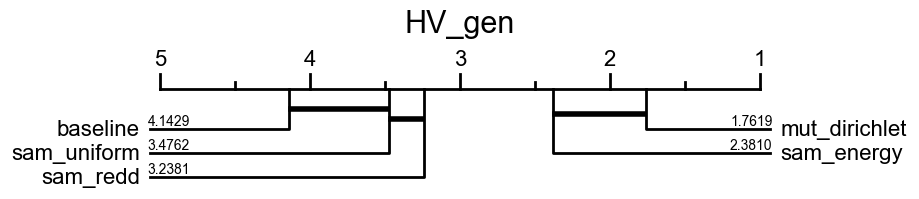

In [16]:
nsgaii_summary = evaluation_methods.merge_dataframes('nsgaii', wfg_problems+dtlz_problems+zdt_problems)
nsgaii_summary = nsgaii_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=nsgaii_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)

## AGE-MOEA

In [15]:
DF =evaluation_methods.get_final_reports(['age_moea'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['age_moea'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['age_moea'], zdt_problems, 2, operators, 20)

In [17]:
age_moea_summary = evaluation_methods.merge_dataframes('age_moea', wfg_problems+dtlz_problems+zdt_problems)
age_moea_summary

,Algorithm,Problem,Operator,Execucion,Generation,HV_gen
0,age_moea,wfg1,baseline,0,249,1.208704
1,age_moea,wfg1,baseline,1,249,1.198874
2,age_moea,wfg1,baseline,2,249,1.208399
3,age_moea,wfg1,baseline,3,249,1.199944
4,age_moea,wfg1,baseline,4,249,1.202833
...,...,...,...,...,...,...
75,age_moea,zdt6,mut_dirichlet,15,249,0.283212
76,age_moea,zdt6,mut_dirichlet,16,249,0.270213
77,age_moea,zdt6,mut_dirichlet,17,249,0.278107
78,age_moea,zdt6,mut_dirichlet,18,249,0.274000


In [18]:
age_moea_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(8)

HV_gen          
                           mean       std
Problem Operator                         
dtlz1   baseline       1.172671  0.006333
        mut_dirichlet  1.290600  0.002939
        sam_energy     1.280171  0.014354
        sam_uniform    1.233515  0.052456
dtlz2   baseline       0.663329  0.139847
        mut_dirichlet  0.794386  0.005661
        sam_energy     0.790382  0.009563
        sam_uniform    0.784937  0.030753

In [20]:
SS = evaluation_methods.conteo_winners('age_moea', problems, ['baseline', 'sam_energy', 'sam_uniform'])
n = 3
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,Borda
baseline,1,5,15,28
sam_energy,16,5,0,58
sam_uniform,4,11,6,40


In [22]:
SS = evaluation_methods.conteo_winners('age_moea', problems, ['baseline', 'mut_dirichlet'])
n = 2
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,Borda
baseline,2,19,23
mut_dirichlet,19,2,40


['baseline' 'mut_dirichlet' 'sam_energy' 'sam_uniform']
baseline          0.0
mut_dirichlet    15.0
sam_energy        4.0
sam_uniform       2.0
dtype: float64
baseline         3.571429
sam_uniform      3.000000
sam_energy       2.000000
mut_dirichlet    1.428571
dtype: float64
('baseline', 'sam_energy', 9.5367431640625e-06, True)
('mut_dirichlet', 'sam_uniform', 0.0011758804321289062, True)
('baseline', 'mut_dirichlet', 0.0021514892578125, True)
('sam_energy', 'sam_uniform', 0.0021514892578125, True)
('baseline', 'sam_uniform', 0.026330947875976562, False)
('mut_dirichlet', 'sam_energy', 0.08879852294921875, False)
Index(['baseline', 'sam_uniform', 'sam_energy', 'mut_dirichlet'], dtype='object')
[0, 1]
[2, 3]


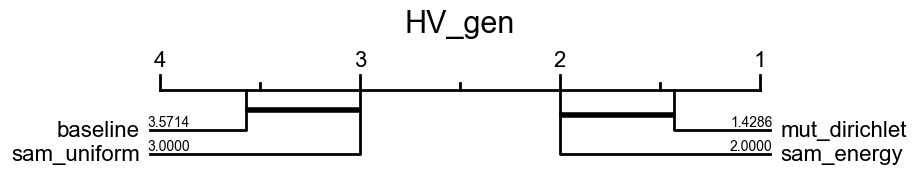

In [4]:
age_moea_summary = evaluation_methods.merge_dataframes('age_moea', wfg_problems+dtlz_problems+zdt_problems)
age_moea_summary = age_moea_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=age_moea_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)